# Credits goes to [@cpmpml](https://www.kaggle.com/cpmpml), its a copy of his notebook for 2025 [BirdCLEF 2024 3rd solution](https://github.com/jfpuget/birdclef-2024/)

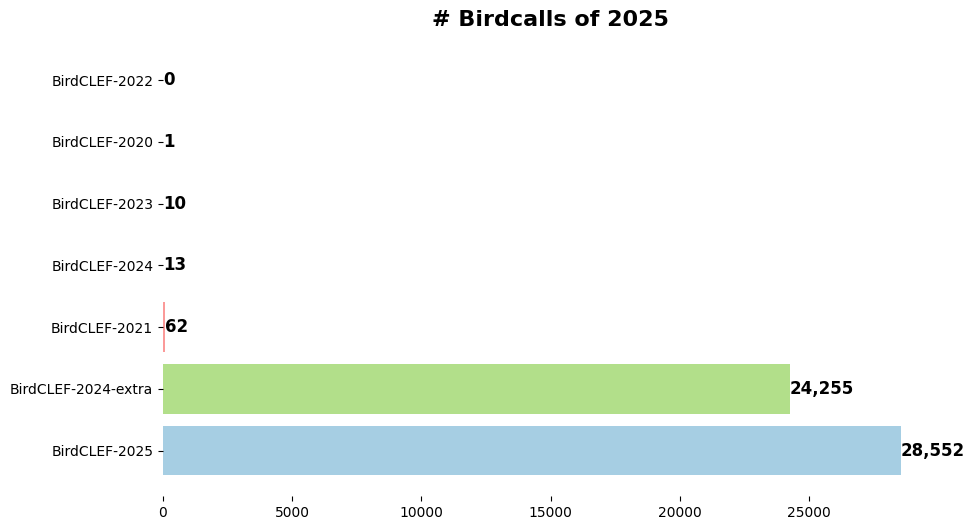

In [1]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['BirdCLEF-2025', 'BirdCLEF-2024-extra', 'BirdCLEF-2021', 'BirdCLEF-2024', 'BirdCLEF-2023', 'BirdCLEF-2020', 'BirdCLEF-2022']
sizes = [28552, 24255, 62, 13, 10, 1, 0]

colors = plt.cm.Paired(np.linspace(0, 1, len(sizes)))

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, sizes, color=colors, edgecolor='none')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():,.0f}', va='center', ha='left', fontsize=12, fontweight='bold', color='black')

plt.title('# Birdcalls of 2025', fontsize=16, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)


# [BirdCLEF 2020-2025 All Training npy Dataset](https://www.kaggle.com/datasets/seshurajup/birdclef-2020-2025-all-training-npy/data)

In [2]:
import numpy as np
import pandas as pd
! rm -rf /kaggle/working/*

In [3]:
cols = ['primary_label', 'secondary_labels', 'record_name', 'source']

In [4]:
train = pd.read_csv('/kaggle/input/birdclef-2025/train.csv')
train

train['record'] = [filename.split('/')[1] for filename in train.filename]
train['record_name'] = [record.split('.')[0] for record in train.record]

train['secondary_labels'] = [eval(secondary_labels) for secondary_labels in train['secondary_labels']]
train['source'] = 'bc25'
train[cols]

,primary_label,secondary_labels,record_name,source
0,1139490,[],CSA36385,bc25
1,1139490,[],CSA36389,bc25
2,1192948,[],CSA36358,bc25
3,1192948,[],CSA36366,bc25
4,1192948,[],CSA36373,bc25
...,...,...,...,...
28559,ywcpar,[],iNat77392,bc25
28560,ywcpar,[],iNat78624,bc25
28561,ywcpar,[],iNat789234,bc25
28562,ywcpar,[],iNat819873,bc25


In [5]:
train_20 = pd.read_csv('/kaggle/input/birdsong-recognition/train.csv')
train_20

train_20['record_name'] = [record.split('.')[0] for record in train_20.filename]
train_20['primary_label'] = train_20['ebird_code']
train_20['source'] = 'bc20'
train_20 = train_20[~train_20.record_name.isin(train.record_name.unique())].reset_index(drop=True)
train_20 = train_20[train_20.primary_label.isin(train.primary_label.unique())].reset_index(drop=True)
train_20[cols]

,primary_label,secondary_labels,record_name,source
0,greegr,[],XC202074,bc20
1,greegr,[],XC264040,bc20
2,greegr,[],XC277289,bc20
3,greegr,[],XC295629,bc20
4,greegr,[],XC304688,bc20
5,greegr,[],XC340208,bc20
6,greegr,"['Quiscalus mexicanus_Great-tailed Grackle', '...",XC412004,bc20


In [6]:
df = train_20[['species', 'ebird_code']].drop_duplicates().sort_values('species').reset_index(drop=True)
df

species2code = {species : code for species, code in zip(df.species, df.ebird_code)}
species2code

def process_secondary_labels(secondary_labels, species2code):
    secondary_labels = eval(secondary_labels)
    labels = []
    for secondary in secondary_labels:
        label = species2code.get(secondary.split('_')[1], '')
        if label != '':
            labels.append(label)
    return labels

train_20['secondary_labels'] = [process_secondary_labels(secondary_labels, species2code) for secondary_labels in train_20['secondary_labels']]

In [7]:
train_21 = pd.read_csv('/kaggle/input/birdclef-2021/train_metadata.csv')
train_21
train_21['secondary_labels'] = [eval(secondary_labels) for secondary_labels in train_21['secondary_labels']]
train_21['record_name'] = [record.split('.')[0] for record in train_21.filename]
train_21['source'] = 'bc21'
train_21 = train_21[~train_21.record_name.isin(train.record_name.unique())].reset_index(drop=True)
train_21 = train_21[train_21.primary_label.isin(train.primary_label.unique())].reset_index(drop=True)
train_21[cols]

,primary_label,secondary_labels,record_name,source
0,blhpar1,[],XC407346,bc21
1,butsal1,[],XC441484,bc21
2,colcha1,[],XC167583,bc21
3,creoro1,[],XC452809,bc21
4,greegr,[],XC256098,bc21
...,...,...,...,...
62,littin1,[],XC117988,bc21
63,roahaw,[grekis],XC540305,bc21
64,rutjac1,[],XC354993,bc21
65,smbani,[],XC306861,bc21


In [8]:
train_22 = pd.read_csv('/kaggle/input/birdclef-2022/train_metadata.csv')
train_22['secondary_labels'] = [eval(secondary_labels) for secondary_labels in train_22['secondary_labels']]
train_22['record_name'] = [record.split('/')[1].split('.')[0] for record in train_22.filename]
train_22['source'] = 'bc22'
train_22 = train_22[~train_22.record_name.isin(train.record_name.unique())].reset_index(drop=True)
train_22 = train_22[train_22.primary_label.isin(train.primary_label.unique())].reset_index(drop=True)
train_22[cols]

,primary_label,secondary_labels,record_name,source


In [9]:
train_23 = pd.read_csv('/kaggle/input/birdclef-2023/train_metadata.csv')
train_23['secondary_labels'] = [eval(secondary_labels) for secondary_labels in train_23['secondary_labels']]
train_23['record_name'] = [record.split('/')[1].split('.')[0] for record in train_23.filename]
train_23['source'] = 'bc23'
train_23 = train_23[~train_23.record_name.isin(train.record_name.unique())].reset_index(drop=True)
train_23 = train_23[train_23.primary_label.isin(train.primary_label.unique())].reset_index(drop=True)
train_23[cols]

,primary_label,secondary_labels,record_name,source
0,greegr,[],XC202074,bc23
1,greegr,[],XC255881,bc23
2,greegr,[],XC256098,bc23
3,greegr,[],XC264040,bc23
4,greegr,[],XC277289,bc23
5,greegr,[],XC295629,bc23
6,greegr,[],XC304688,bc23
7,greegr,[],XC340208,bc23
8,greegr,[],XC497808,bc23
9,greegr,[],XC528049,bc23


In [10]:
train_24 = pd.read_csv('/kaggle/input/birdclef-2024/train_metadata.csv')
train_24['secondary_labels'] = [eval(secondary_labels) for secondary_labels in train_24['secondary_labels']]
train_24['record_name'] = [record.split('/')[1].split('.')[0] for record in train_24.filename]
train_24['source'] = 'bc24'
train_24 = train_24[~train_24.record_name.isin(train.record_name.unique())].reset_index(drop=True)
train_24 = train_24[train_24.primary_label.isin(train.primary_label.unique())].reset_index(drop=True)
train_24[cols]

,primary_label,secondary_labels,record_name,source
0,greegr,[],XC202074,bc24
1,greegr,[],XC255881,bc24
2,greegr,[],XC256098,bc24
3,greegr,[],XC264040,bc24
4,greegr,[],XC277289,bc24
5,greegr,[],XC295629,bc24
6,greegr,[],XC304688,bc24
7,greegr,[],XC340208,bc24
8,greegr,[],XC497808,bc24
9,greegr,[],XC528049,bc24


In [11]:
from glob import glob
file_paths = glob("/kaggle/input/birdclef2024-additional-mp3/additional_audio" + "/*/*")
len(file_paths), file_paths[:5]
train_additional = pd.DataFrame({
    'filename' : ['/'.join(filepath.split('/')[-2:]) for filepath in file_paths],
    'species' : [filepath.split('/')[-2] for filepath in file_paths],
    'record' : [filepath.split('/')[-1] for filepath in file_paths],
    'filepath': file_paths,
})
train_additional['source'] = 'bc00'
train_additional['record_name'] = [record.split('.')[0] for record in train_additional.record]
train_additional['primary_label'] = train_additional['species']
train_additional['secondary_labels'] = [[] for _ in train_additional['primary_label']]
train_additional = train_additional[~train_additional.record_name.isin(train.record_name.unique())].reset_index(drop=True)
train_additional[cols]

,primary_label,secondary_labels,record_name,source
0,redspu1,[],XC104135,bc00
1,redspu1,[],XC162845,bc00
2,redspu1,[],XC473855,bc00
3,redspu1,[],XC209620,bc00
4,redspu1,[],XC369221,bc00
...,...,...,...,...
24251,litegr,[],XC618372,bc00
24252,litegr,[],XC300265,bc00
24253,litegr,[],XC402724,bc00
24254,litegr,[],XC497470,bc00


In [12]:
all_train = pd.concat([train_20[cols], 
                       train_21[cols], 
                       train_22[cols], 
                       train_23[cols],
                       train_24[cols],
                       train[cols],
                       train_additional[cols]
                       ]).reset_index(drop=True)
all_train

,primary_label,secondary_labels,record_name,source
0,greegr,[],XC202074,bc20
1,greegr,[],XC264040,bc20
2,greegr,[],XC277289,bc20
3,greegr,[],XC295629,bc20
4,greegr,[],XC304688,bc20
...,...,...,...,...
52925,litegr,[],XC618372,bc00
52926,litegr,[],XC300265,bc00
52927,litegr,[],XC402724,bc00
52928,litegr,[],XC497470,bc00


In [13]:
all_train = all_train.sort_values(['primary_label', 'source'], ascending=False).reset_index(drop=True)
all_train = all_train.drop_duplicates('record_name')
all_train['rank'] = all_train.groupby('primary_label').source.rank(method='first', ascending=False)
all_train

,primary_label,secondary_labels,record_name,source,rank
0,zitcis1,[],XC263825,bc00,1.0
1,zitcis1,[],XC348598,bc00,2.0
2,zitcis1,[],XC789753,bc00,3.0
3,zitcis1,[],XC157177,bc00,4.0
4,zitcis1,[],XC128061,bc00,5.0
...,...,...,...,...,...
52925,1192948,[],CSA36366,bc25,2.0
52926,1192948,[],CSA36373,bc25,3.0
52927,1192948,[],CSA36388,bc25,4.0
52928,1139490,[],CSA36385,bc25,1.0


In [14]:
all_train.source.value_counts()

source
bc25    28552
bc00    24255
bc21       62
bc24       13
bc23       10
bc20        1
Name: count, dtype: int64

In [15]:
all_train.to_csv('/kaggle/working/all_train.csv', index=False)

In [16]:
from pathlib import Path
from tqdm import tqdm
import librosa
sr = 32000

def load_audio(record_name, primary_label, source):
    if source == 'bc20':
        pathname = Path('/kaggle/input/birdsong-recognition/train_audio/') / primary_label / (record_name + '.mp3')
    elif source == 'bc21':
        pathname = Path('/kaggle/input/birdclef-2021/train_short_audio/') / primary_label / (record_name + '.ogg')
    elif source == 'bc22':
        pathname = Path('/kaggle/input/birdclef-2022/train_audio/') / primary_label / (record_name + '.ogg')
    elif source == 'bc23':
        pathname = Path('/kaggle/input/birdclef-2023/train_audio/') / primary_label / (record_name + '.ogg')
    elif source == 'bc24':
        pathname = Path('/kaggle/input/birdclef-2024/train_audio/') / primary_label / (record_name + '.ogg')
    audio = librosa.load(pathname, sr=32000)[0].astype(np.float32)
    return audio

In [17]:
import os
lengths = []
for record_name, primary_label, source in zip(tqdm(all_train.record_name), all_train.primary_label, all_train.source):
    if source in ['bc20', 'bc21', 'bc22', 'bc23', 'bc24']:
        audio = load_audio(record_name, primary_label, source)
        lengths.append(len(audio))
        save_path = Path('/kaggle/working/') / primary_label
        os.makedirs(save_path, exist_ok=True)
        np.save(save_path / ('first10_' + record_name), audio[: 10 * sr])
        np.save(save_path / ('last10_' + record_name), audio[-10 * sr : ])

100%|██████████| 52893/52893 [00:24<00:00, 2162.69it/s]
